In [12]:
import pandas as pd
Netflix_users_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lesson14/netflix_users_data.csv')

In [13]:
Netflix_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


Предобработка данных

In [14]:
# Приведение столбцов в формат camelCase
def to_camel_case(column_name):
    parts = column_name.replace('(', '').replace(')', '').replace(' ', '').split('_')
    return parts[0].lower() + ''.join(word.title() for word in parts[1:])

Netflix_users_df.columns = [to_camel_case(col) for col in Netflix_users_df.columns]

print(Netflix_users_df)

      userid subscriptiontype  monthlyrevenue  joindate lastpaymentdate  \
0          1            Basic              10  15-01-22        10-06-23   
1          2          Premium              15  05-09-21        22-06-23   
2          3         Standard              12  28-02-23        27-06-23   
3          4         Standard              12  10-07-22        26-06-23   
4          5            Basic              10  01-05-23        28-06-23   
...      ...              ...             ...       ...             ...   
2495    2496          Premium              14  25-07-22        12-07-23   
2496    2497            Basic              15  04-08-22        14-07-23   
2497    2498         Standard              12  09-08-22        15-07-23   
2498    2499         Standard              13  12-08-22        12-07-23   
2499    2500            Basic              15  13-08-22        12-07-23   

             country  age  gender      device planduration  
0      United States   28    Male  Sma

In [15]:
Netflix_users_df.columns

Index(['userid', 'subscriptiontype', 'monthlyrevenue', 'joindate',
       'lastpaymentdate', 'country', 'age', 'gender', 'device',
       'planduration'],
      dtype='object')

In [17]:
import pandas as pd

# Предполагается, что у вас уже загружен DataFrame Netflix_users_df

# Преобразование столбцов дат в формат datetime
try:
    Netflix_users_df['joindate'] = pd.to_datetime(Netflix_users_df['joindate'])
    Netflix_users_df['lastpaymentdate'] = pd.to_datetime(Netflix_users_df['lastpaymentdate'])
    print("Преобразование дат прошло успешно.")
except ValueError as e:
    print(f"Ошибка при преобразовании дат: {e}")
    print("Проверьте формат дат в ваших столбцах 'joindate' и 'lastpaymentdate'.  Вам может потребоваться указать формат явно с помощью параметра 'format' в функции pd.to_datetime.")


# Проверка типов данных после преобразования (опционально)
print(Netflix_users_df.dtypes)

Преобразование дат прошло успешно.
userid                       int64
subscriptiontype            object
monthlyrevenue               int64
joindate            datetime64[ns]
lastpaymentdate     datetime64[ns]
country                     object
age                          int64
gender                      object
device                      object
planduration                object
dtype: object


<ipython-input-17-098b7edf37d5>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Netflix_users_df['joindate'] = pd.to_datetime(Netflix_users_df['joindate'])
<ipython-input-17-098b7edf37d5>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Netflix_users_df['lastpaymentdate'] = pd.to_datetime(Netflix_users_df['lastpaymentdate'])


In [18]:
Netflix_users_df

,userid,subscriptiontype,monthlyrevenue,joindate,lastpaymentdate,country,age,gender,device,planduration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


In [19]:
# Удаление дубликатов
Netflix_users_df = Netflix_users_df.drop_duplicates()

# Удаление строк с пропусками
Netflix_users_df = Netflix_users_df.dropna()

# Проверим изменения
print(f"Размер датафрейма после обработки: {Netflix_users_df.shape}")

Размер датафрейма после обработки: (2500, 10)


Исследовательский анализ данных

In [20]:
import pandas as pd

# Предположим, что ваш DataFrame уже загружен в переменную Netflix_users_df

# Узнаем количество уникальных пользователей
unique_users_count = Netflix_users_df['userid'].nunique()

# Находим дату первого появления пользователя
earliest_join_date = Netflix_users_df['joindate'].min()

# Находим дату последнего появления пользователя
latest_join_date = Netflix_users_df['joindate'].max()

# Выводим результаты
print(f"Количество уникальных пользователей: {unique_users_count}")
print(f"Период появления пользователей: с {earliest_join_date} по {latest_join_date}")

Количество уникальных пользователей: 2500
Период появления пользователей: с 2021-05-09 00:00:00 по 2023-12-01 00:00:00


Анализ возраста:
count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: age, dtype: float64


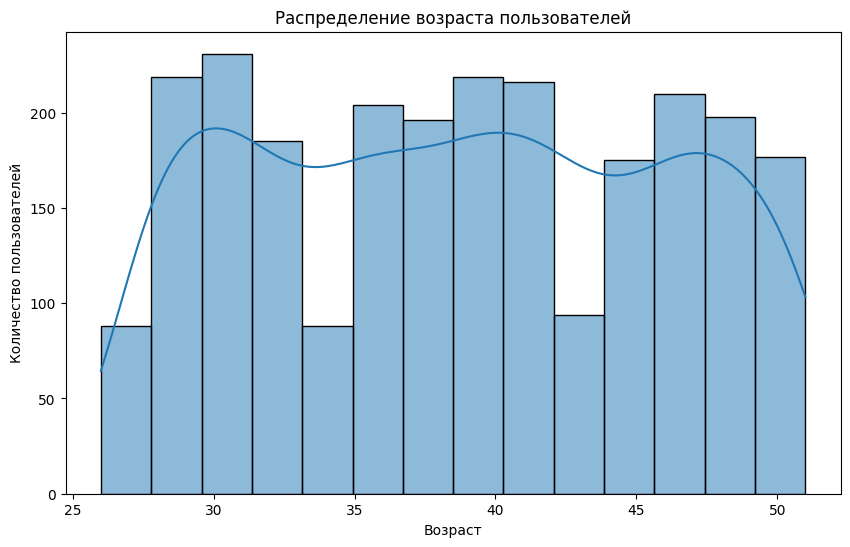


Анализ пола:
gender
Female    1257
Male      1243
Name: count, dtype: int64


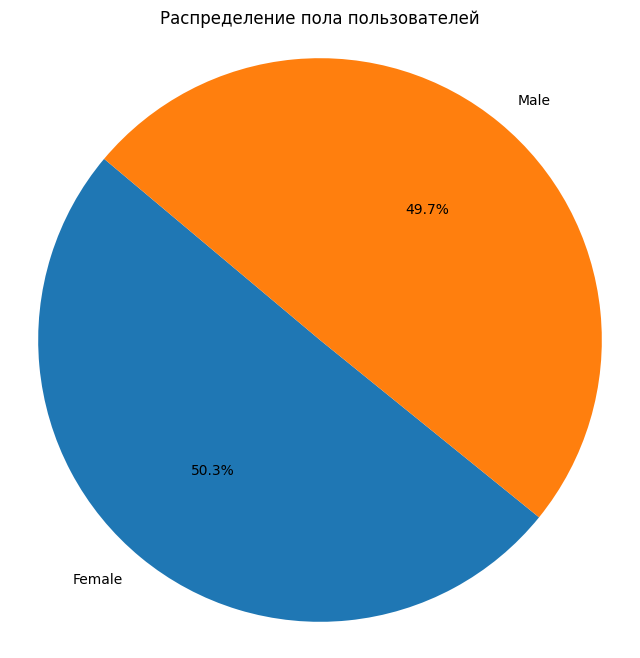

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у вас уже загружен DataFrame Netflix_users_df

# Анализ возраста
print("Анализ возраста:")
print(Netflix_users_df['age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(Netflix_users_df['age'], kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()


# Анализ пола
gender_counts = Netflix_users_df['gender'].value_counts(dropna=False)
print("\nАнализ пола:")
print(gender_counts)

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение пола пользователей')
plt.axis('equal')
plt.show()

Вывод:

Средний возраст пользователей 38 лет (при этом самому молодому 26 лет, а самому старшему 51 год)
Распределение по полу практически одинаковое (50.3 % мужчин, 49.7 % женщины)

<ipython-input-23-6cc62153c45c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')


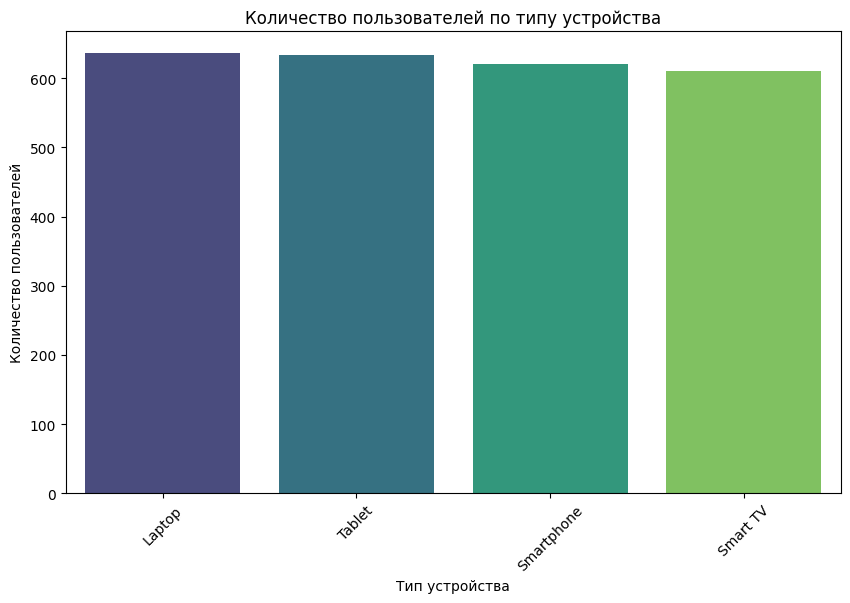

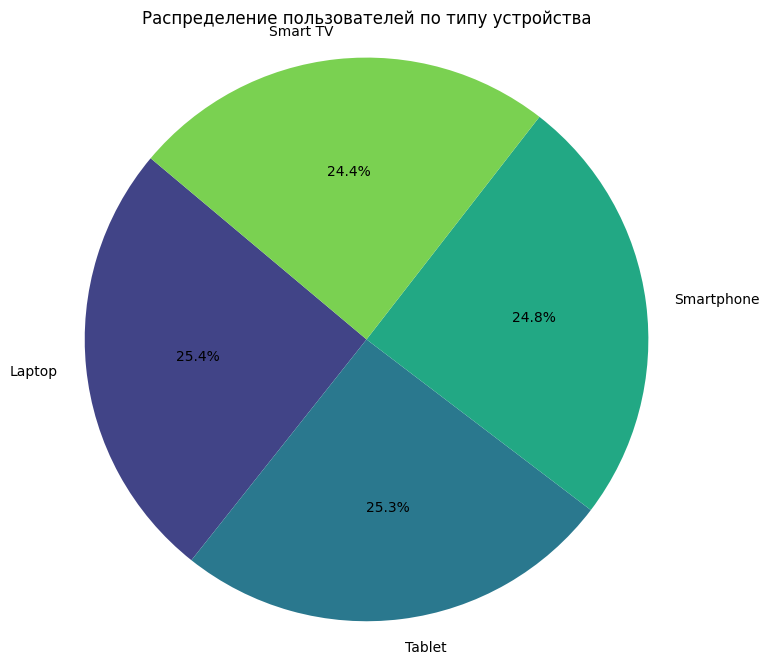

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что ваш датафрейм уже загружен
# Netflix_users_df = pd.read_csv('path_to_your_data.csv')

# Подсчет количества пользователей по каждому типу устройства
device_counts = Netflix_users_df['device'].value_counts()

# Столбчатая диаграмма
plt.figure(figsize=(10, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')
plt.title('Количество пользователей по типу устройства')
plt.xlabel('Тип устройства')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

# Круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(device_counts)))
plt.title('Распределение пользователей по типу устройства')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

Вывод:

Пользователи в одинаковых пропорциях используют четыре популярных девайса (Laptop 25.4%, Tablet 25.3%, Smartphone 24.8%, SmartTV 24.4%)

<ipython-input-24-cb7994477449>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette='viridis')


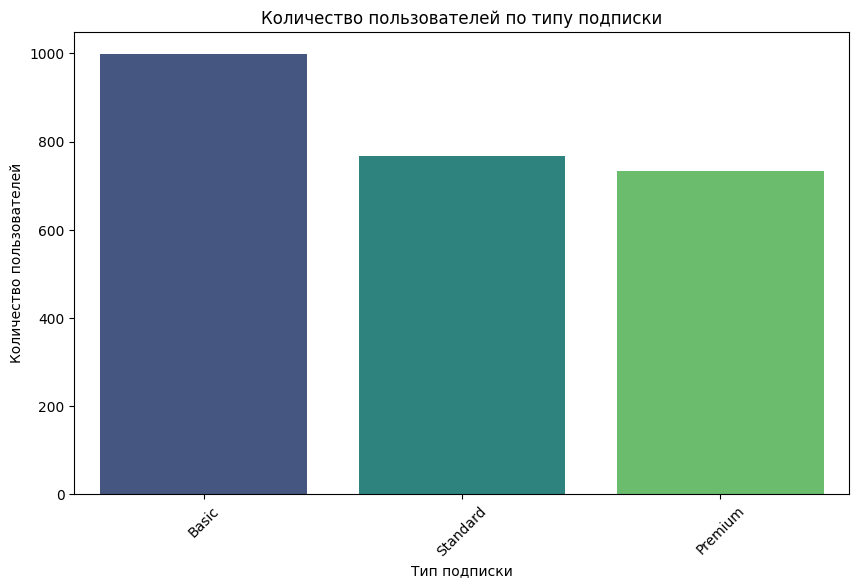

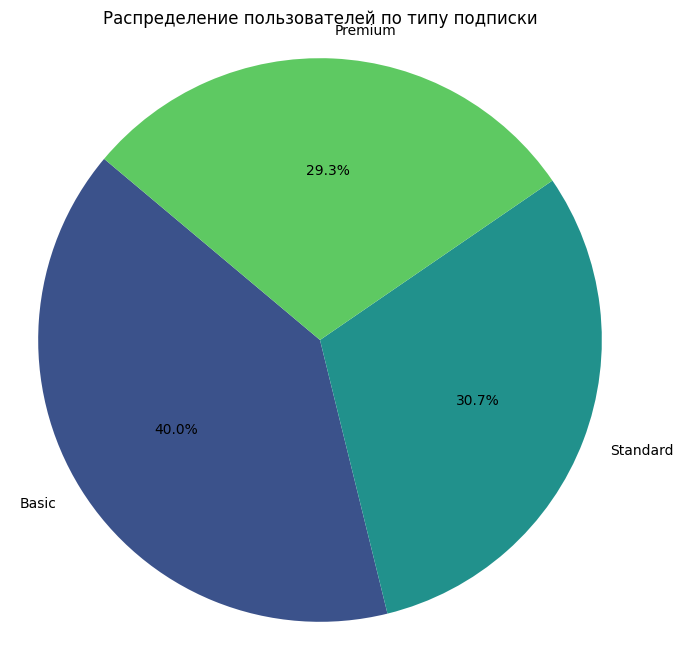

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что ваш датафрейм уже загружен
# Netflix_users_df = pd.read_csv('path_to_your_data.csv')

# Подсчет количества пользователей по каждому типу подписки
subscription_counts = Netflix_users_df['subscriptiontype'].value_counts()

# Столбчатая диаграмма
plt.figure(figsize=(10, 6))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette='viridis')
plt.title('Количество пользователей по типу подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

# Круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(subscription_counts)))
plt.title('Распределение пользователей по типу подписки')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

Вывод:

Подписка Basic пользуется наибольшей популярностью 40%, а Standart и Premium практически равны (30.7% и 29.3% соответственно)

<ipython-input-25-a86728f21466>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Netflix_users_df['country'].fillna('Unknown', inplace=True)


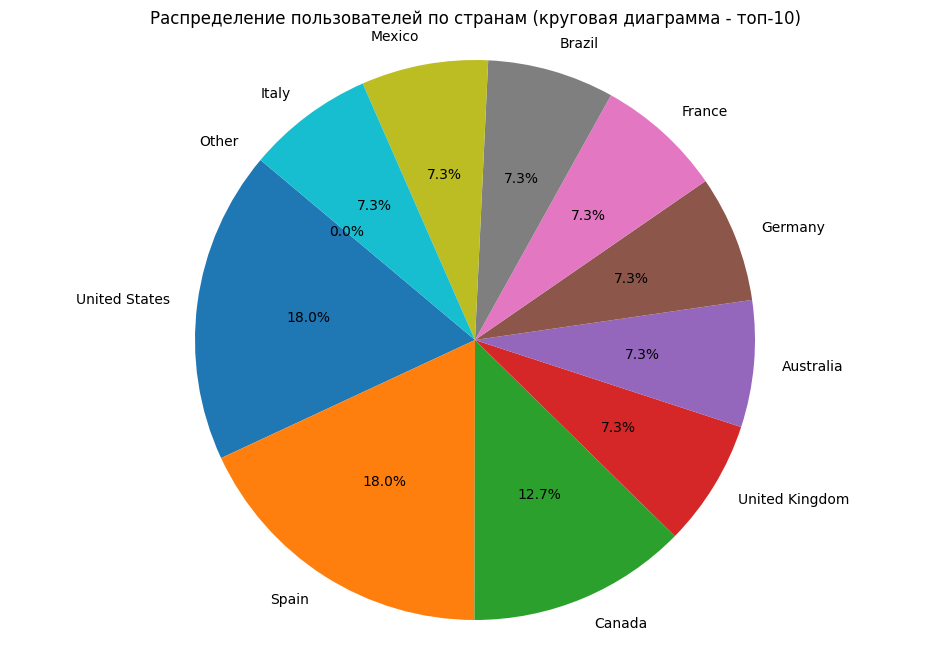

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у вас уже загружен DataFrame Netflix_users_df

# Обработка пропущенных значений (опционально) -  заполняем пропущенные значения "Unknown"
Netflix_users_df['country'].fillna('Unknown', inplace=True)

# Подсчет количества пользователей в каждой стране
country_counts = Netflix_users_df['country'].value_counts()

# Выбор типа диаграммы (измените на 'bar' для столбчатой диаграммы)
chart_type = 'pie' # 'pie' or 'bar'

if chart_type == 'bar':
    # Построение столбчатой диаграммы
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_counts.index, y=country_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('Страна')
    plt.ylabel('Количество пользователей')
    plt.title('Распределение пользователей по странам (столбчатая диаграмма)')
    plt.tight_layout()
elif chart_type == 'pie':
    # Построение круговой диаграммы (только для топ-N стран)
    top_n = 10 #  Показывает топ-10 стран. Измените значение для отображения большего/меньшего количества стран.
    country_counts_top_n = country_counts.head(top_n)
    other_count = country_counts[top_n:].sum()
    country_counts_top_n['Other'] = other_count

    plt.figure(figsize=(12, 8))
    plt.pie(country_counts_top_n, labels=country_counts_top_n.index, autopct='%1.1f%%', startangle=140)
    plt.title('Распределение пользователей по странам (круговая диаграмма - топ-10)')
    plt.axis('equal')
else:
    print("Неверный тип диаграммы. Выберите 'bar' или 'pie'.")

plt.show()

Вывод:

Испания и США имеют по 18% пользователей, на третьем месте Канада 12.7%. Остальные страны в среднем по 7% пользователей

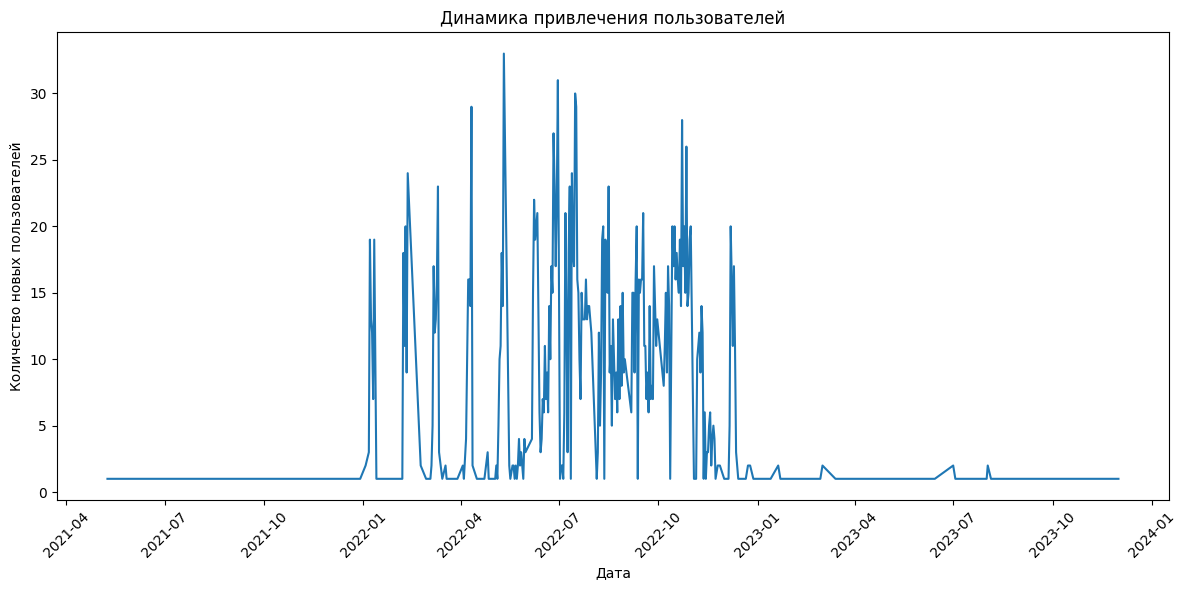

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже загружен DataFrame Netflix_users_df

# Преобразование joindate в datetime, если это ещё не сделано
Netflix_users_df['joindate'] = pd.to_datetime(Netflix_users_df['joindate'])

# Подсчет количества новых пользователей по дням
daily_join_counts = Netflix_users_df.groupby('joindate')['userid'].count()

# Проверка на необходимость группировки по месяцам
if len(daily_join_counts) > 365:  # Если больше года данных, группируем по месяцам
    monthly_join_counts = daily_join_counts.resample('M').sum()
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_join_counts.index, monthly_join_counts.values)
    plt.xlabel('Месяц')
    plt.ylabel('Количество новых пользователей')
    plt.title('Динамика привлечения пользователей (группировка по месяцам)')
    plt.xticks(rotation=45)
    plt.tight_layout()
else:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_join_counts.index, daily_join_counts.values)
    plt.xlabel('Дата')
    plt.ylabel('Количество новых пользователей')
    plt.title('Динамика привлечения пользователей')
    plt.xticks(rotation=45)
    plt.tight_layout()


plt.show()

Вывод:

Наибольший приток новых пользователей был отмечен в 2022 году с января по декабрь. Максимальный был в мае месяце.

Общая накопленная выручка сервиса: 335290.01

Статистическая сводка по накопленной выручке:
count    2500.000000
mean      134.116005
std        51.692045
min         0.000000
25%        98.998029
50%       130.617608
75%       167.411301
max       381.406045
Name: accumulated_revenue, dtype: float64


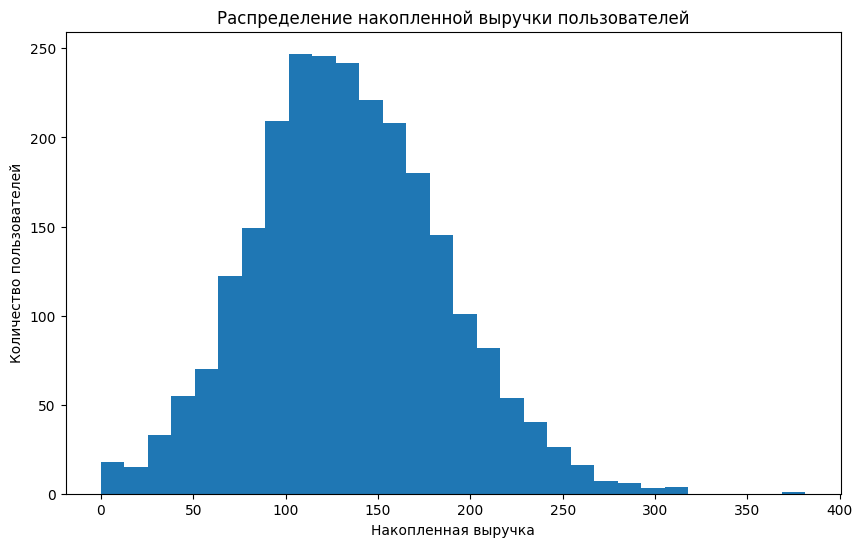

In [27]:
import pandas as pd
import numpy as np

# Предполагается, что у вас уже загружен DataFrame Netflix_users_df и даты в формате datetime

# Вычисление разницы во времени в месяцах
Netflix_users_df['time_diff_months'] = (Netflix_users_df['lastpaymentdate'] - Netflix_users_df['joindate']).dt.days / 30.44

#Обработка отрицательных значений time_diff_months (если таковые есть)
Netflix_users_df['time_diff_months'] = np.maximum(0, Netflix_users_df['time_diff_months'])

#Вычисление накопленной выручки для каждого пользователя
Netflix_users_df['accumulated_revenue'] = Netflix_users_df['monthlyrevenue'] * Netflix_users_df['time_diff_months']

# Проверка на наличие некорректных значений
if Netflix_users_df['accumulated_revenue'].isnull().any():
    print("Warning: Some accumulated revenue values are NaN. Check your data for missing values in relevant columns.")

# Суммирование общей выручки сервиса
total_revenue = Netflix_users_df['accumulated_revenue'].sum()
print(f"Общая накопленная выручка сервиса: {total_revenue:.2f}")


#Дополнительный анализ (опционально)
print("\nСтатистическая сводка по накопленной выручке:")
print(Netflix_users_df['accumulated_revenue'].describe())

#Гистограмма накопленной выручки (опционально)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(Netflix_users_df['accumulated_revenue'], bins=30)
plt.xlabel("Накопленная выручка")
plt.ylabel("Количество пользователей")
plt.title("Распределение накопленной выручки пользователей")
plt.show()

Вывод:

Общая накопленная выручка сервиса: 335290.01

Статистическая сводка по накопленной выручке:

count    2500.000000

mean      134.116005

std        51.692045

min         0.000000

25%        98.998029

50%       130.617608

75%       167.411301

max       381.406045

<ipython-input-28-15fe43aa5f42>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_revenue_by_age = Netflix_users_df.groupby('age_group')['monthlyrevenue'].mean()


Средняя ежемесячная выручка по возрастным группам:
age_group
0-17           NaN
18-24          NaN
25-34    12.536375
35-49    12.510582
50-64    12.361582
65+            NaN
Name: monthlyrevenue, dtype: float64

Самая платежеспособная группа: 25-34 (средняя выручка: 12.54)

Распределение количества пользователей по возрастным группам:
age_group
35-49    1512
25-34     811
50-64     177
0-17        0
18-24       0
65+         0
Name: count, dtype: int64


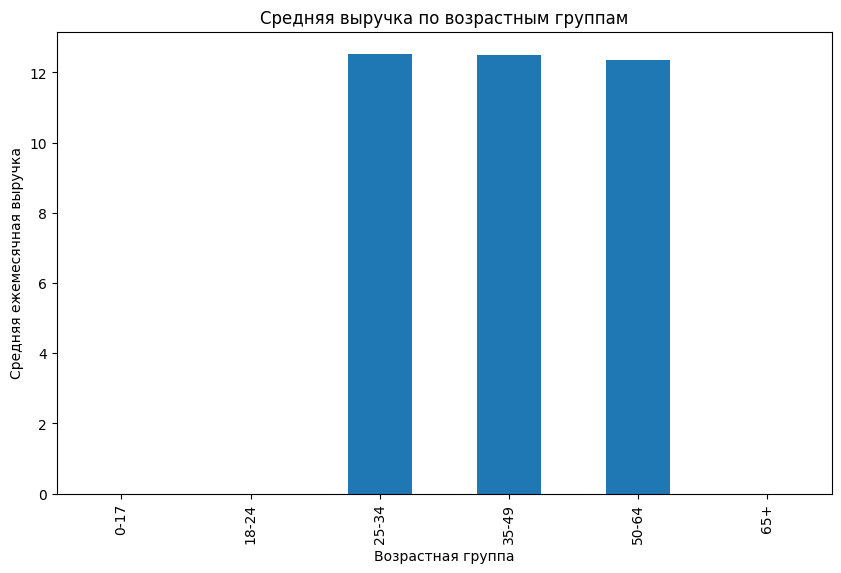

In [28]:
import pandas as pd
import numpy as np

# Предполагается, что у вас уже загружен DataFrame Netflix_users_df

# Определение границ возрастных групп (можно настроить)
bins = [0, 18, 25, 35, 50, 65, np.inf]  # Пример: 0-18, 18-25, 25-35, 35-50, 50-65, 65+
labels = ['0-17', '18-24', '25-34', '35-49', '50-64', '65+']

# Создание нового столбца с возрастными группами
Netflix_users_df['age_group'] = pd.cut(Netflix_users_df['age'], bins=bins, labels=labels, right=False)

# Группировка по возрастным группам и вычисление средней ежемесячной выручки
average_revenue_by_age = Netflix_users_df.groupby('age_group')['monthlyrevenue'].mean()

# Определение самой платежеспособной группы
most_profitable_group = average_revenue_by_age.idxmax()
most_profitable_revenue = average_revenue_by_age.max()

print("Средняя ежемесячная выручка по возрастным группам:")
print(average_revenue_by_age)
print(f"\nСамая платежеспособная группа: {most_profitable_group} (средняя выручка: {most_profitable_revenue:.2f})")

#Дополнительный анализ - распределение количества пользователей по группам (опционально)
age_group_counts = Netflix_users_df['age_group'].value_counts()
print("\nРаспределение количества пользователей по возрастным группам:")
print(age_group_counts)

# Визуализация (опционально)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
average_revenue_by_age.plot(kind='bar')
plt.xlabel("Возрастная группа")
plt.ylabel("Средняя ежемесячная выручка")
plt.title("Средняя выручка по возрастным группам")
plt.show()


Вывод:

Самая платежеспособная группа: 25-34 (средняя выручка: 12.54)

Распределение количества пользователей по возрастным группам:

(35-49) - 1512

(25-34) - 811

(50-64) - 177

<ipython-input-29-529a52d4ed74>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subscription_counts = Netflix_users_df.groupby(['age_group', 'subscriptiontype'])['userid'].count().unstack()


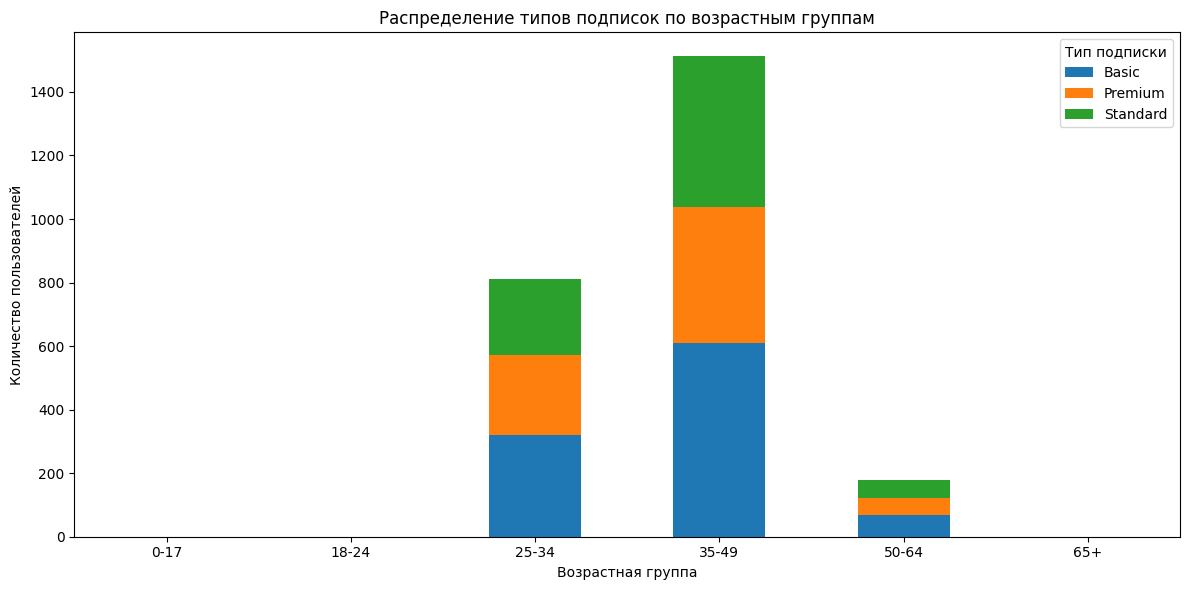


Топ-3 возрастные группы с наибольшей долей премиум-подписок:
subscriptiontype  Basic  Premium  Standard  premium_ratio
age_group                                                
25-34               320      253       238       0.311961
50-64                69       52        56       0.293785
35-49               610      428       474       0.283069


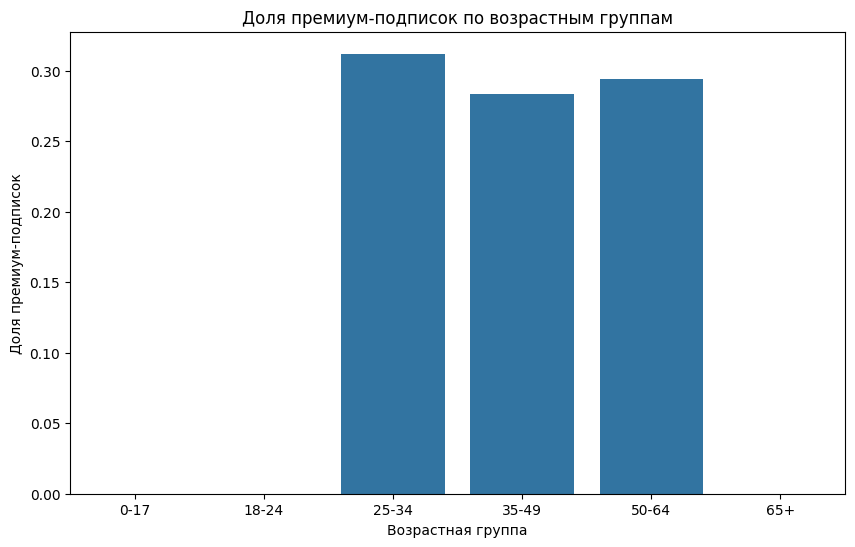

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у вас уже загружен DataFrame Netflix_users_df

# Определение границ возрастных групп (можно настроить)
bins = [0, 18, 25, 35, 50, 65, np.inf]
labels = ['0-17', '18-24', '25-34', '35-49', '50-64', '65+']

# Создание столбца с возрастными группами
Netflix_users_df['age_group'] = pd.cut(Netflix_users_df['age'], bins=bins, labels=labels, right=False)


# Подсчет типов подписок в каждой возрастной группе
age_subscription_counts = Netflix_users_df.groupby(['age_group', 'subscriptiontype'])['userid'].count().unstack()

# Визуализация
age_subscription_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Распределение типов подписок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.legend(title='Тип подписки')
plt.tight_layout()
plt.show()


# Расчет доли премиум-подписок в каждой группе
age_subscription_counts['premium_ratio'] = age_subscription_counts['Premium'] / age_subscription_counts.sum(axis=1)

# Определение групп с наибольшей долей премиум-подписок
top_premium_groups = age_subscription_counts.sort_values(by='premium_ratio', ascending=False).head(3)

print("\nТоп-3 возрастные группы с наибольшей долей премиум-подписок:")
print(top_premium_groups)


# Обработка случаев, где нет Premium подписок
age_subscription_counts.fillna(0, inplace=True) #Заполняем нулями, если в какой-то группе нет премиум-подписок

#Для большей наглядности: диаграмма доли премиум подписок
plt.figure(figsize=(10, 6))
sns.barplot(x=age_subscription_counts.index, y=age_subscription_counts['premium_ratio'])
plt.xlabel("Возрастная группа")
plt.ylabel("Доля премиум-подписок")
plt.title("Доля премиум-подписок по возрастным группам")
plt.show()

Вывод:

Топ-3 возрастные группы с наибольшей долей премиум-подписок:
(age_group/Basic/Premium/Standard/premium_ratio)
                                                
25-34 /             320   /   253   /    238   /    0.311961

50-64       /         69   /    52    /    56   /    0.293785

35-49       /       610    /  428     /  474   /    0.283069

In [30]:
import pandas as pd
import plotly.express as px

def analyze_subscription_country(df: pd.DataFrame) -> None:
    """
    Analyzes the relationship between subscription type and user country using interactive visualization.

    Args:
        df: Pandas DataFrame with 'subscriptiontype' and 'country' columns.  Must have at least 100 rows.
    """

    if not {'subscriptiontype', 'country'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'subscriptiontype' and 'country' columns.")
    if len(df) < 100:
        raise ValueError("DataFrame must contain at least 100 rows for meaningful analysis.")

    # Handle missing values (replace with your preferred missing data handling strategy)
    df = df.dropna(subset=['subscriptiontype', 'country'])

    #Countplot with plotly.express
    fig = px.histogram(df,
                       x='country',
                       color='subscriptiontype',
                       barmode='group',
                       title='Распределение типов подписки по странам',
                       labels={'country': 'Страна', 'count': 'Количество пользователей', 'subscriptiontype': 'Тип подписки'},
                       category_orders={"country": df['country'].value_counts().index})

    fig.update_layout(xaxis_title='Страна', yaxis_title='Количество пользователей')
    fig.update_traces(marker_line_width=1, marker_line_color='black')

    fig.show()


    #Summary table
    country_subs_counts = df.groupby(['country', 'subscriptiontype']).size().unstack()
    print("\nТаблица количества подписок по странам:\n", country_subs_counts)


# Пример использования (замените 'Netflix_users_df' на ваше имя DataFrame)
try:
    analyze_subscription_country(Netflix_users_df)
except ValueError as e:
    print(f"Ошибка: {e}")
except Exception as e:
    print(f"Произошла непредвиденная ошибка: {e}")


Таблица количества подписок по странам:
 subscriptiontype  Basic  Premium  Standard
country                                   
Australia          31.0    101.0      51.0
Brazil            146.0     33.0       4.0
Canada            145.0     88.0      84.0
France             36.0    147.0       NaN
Germany           149.0      3.0      31.0
Italy             176.0      4.0       3.0
Mexico              4.0      NaN     179.0
Spain             110.0    212.0     129.0
United Kingdom      3.0      NaN     180.0
United States     199.0    145.0     107.0


Вывод:

Распределение типов подписки по странам:

Три страны (США, Испания и Канада) используют в полной мере все виды подписок, хотя в Испании преобладает Premium, а странах Северной Америки Basic. В Мексике и Соединенном Королевстве пользователи используют практически только подписку Standart

**ВЫВОДЫ**

Количество уникальных пользователей: 2500

Период появления пользователей: с 2021-05-09 00:00:00 по 2023-12-01 00:00:00

Средний возраст пользователей 38 лет (при этом самому молодому 26 лет, а самому старшему 51 год)

Распределение по полу практически одинаковое (50.3 % мужчин, 49.7 % женщины)

Пользователи в одинаковых пропорциях используют четыре популярных девайса (Laptop 25.4%, Tablet 25.3%, Smartphone 24.8%, SmartTV 24.4%)

Подписка Basic пользуется наибольшей популярностью 40%, а Standart и Premium практически равны (30.7% и 29.3% соответственно)

Испания и США имеют по 18% пользователей, на третьем месте Канада 12.7%. Остальные страны в среднем по 7% пользователей

Наибольший приток новых пользователей был отмечен в 2022 году с января по декабрь. Максимальный был в мае месяце.

Общая накопленная выручка сервиса: 335290.01

Статистическая сводка по накопленной выручке:

count 2500.000000

mean 134.116005

std 51.692045

min 0.000000

25% 98.998029

50% 130.617608

75% 167.411301

max 381.406045


Самая платежеспособная группа: 25-34 года (средняя выручка: 12.54)

Распределение количества пользователей по возрастным группам:

(35-49) - 1512

(25-34) - 811

(50-64) - 177



Топ-3 возрастные группы с наибольшей долей премиум-подписок:

(age_group/Basic/Premium/Standard/premium_ratio)

25-34 / 320 / 253 / 238 / 0.311961

50-64 / 69 / 52 / 56 / 0.293785

35-49 / 610 / 428 / 474 / 0.283069


Распределение типов подписки по странам:

Три страны (США, Испания и Канада) используют в полной мере все виды подписок, хотя в Испании преобладает Premium, а странах Северной Америки Basic. В Мексике и Соединенном Королевстве пользователи используют практически только подписку Standart
